In [1]:
import matplotlib.pyplot as plt
import numpy as np

import string
import random
import nltk
from nltk.corpus import stopwords
import json

import sklearn
import seaborn as sn
import pandas as pd
import tensorflow as tf
import operator

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
# get list of stopwords to be discarded
nltk.download('stopwords')
stopwords_list = [s.translate(str.maketrans('', '', string.punctuation)) for s in stopwords.words('english')]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wbh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# 1. Get and read data

categories = ['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY', 'PARENTING', 'HEALTHY LIVING', 'QUEER VOICES', 'FOOD & DRINK', 'BUSINESS', 'COMEDY', 'SPORTS', 'BLACK VOICES', 'HOME & LIVING', 'PARENTS', 'THE WORLDPOST', 'WEDDINGS', 'WOMEN', 'IMPACT', 'DIVORCE', 'CRIME', 'MEDIA', 'WEIRD NEWS', 'GREEN', 'WORLDPOST', 'RELIGION', 'STYLE', 'SCIENCE', 'WORLD NEWS', 'TASTE', 'TECH', 'MONEY', 'ARTS', 'FIFTY', 'GOOD NEWS', 'ARTS & CULTURE', 'ENVIRONMENT', 'COLLEGE', 'LATINO VOICES', 'CULTURE & ARTS', 'EDUCATION']

categories = categories[:6]

# get n random samples from file
data = []
with open('News_Category_Dataset_v2.json') as source:
    for line in source:
        data.append(json.loads(line))
n = 10000
data = random.sample(data, n)

# extract ys and count instances of each word in dataset
word_lists = []
ys = []
word_to_count = {}

for i in range(n):
    if(data[i]['category'] in categories):
        ys.append(categories.index(data[i]['category']))
        word_list = []
        headline = data[i]['headline']
        headline = headline.translate(str.maketrans('', '', string.punctuation))
        headline = headline.lower()
        
        for word in headline.split():
            if not word in stopwords_list:
                word_to_count[word] = (word_to_count[word] + 1) if (word in word_to_count) else 1
                if not word in word_list:
                    word_list.append(word)
        word_lists.append(word_list)

n = len(ys)

# cull unique words
vocabulary = [word for word in word_to_count.keys() if word_to_count[word] > 1]
p = len(vocabulary)

# encode x
xs = []
for i in range(n):
    x = np.zeros(p)
    for word in word_lists[i]:
        if(word in vocabulary):
            x[vocabulary.index(word)] = 1.
    xs.append(x)

In [4]:
train_pct = 0.8
sep = int(n*train_pct)
x_train, y_train = xs[:sep], ys[:sep]
x_test, y_test = xs[sep:], ys[sep:]

In [5]:
lr = sklearn.linear_model.LogisticRegression(class_weight='balanced')

In [6]:
lr.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [7]:
y_pred = lr.predict(x_test)

In [8]:
#cm = sklearn.metrics.confusion_matrix(y_test, y_pred, normalize='true')
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)

<AxesSubplot:>

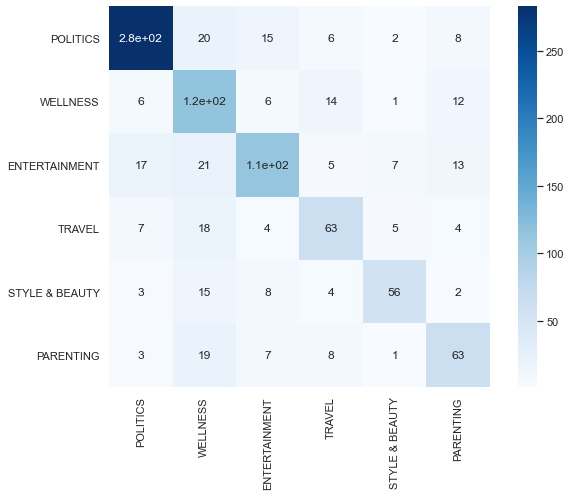

In [9]:
df_cm = pd.DataFrame(cm, index = categories, columns = categories)
plt.figure(figsize = (10,7))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, cmap='Blues', xticklabels=True, yticklabels=True, square=True)

In [10]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.7264150943396226